In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import seaborn as sns
import numpy as np
import pandas as pd
import math
from datetime import datetime
import glob, os
from numpy import average


plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.max_open_warning']=False
plt.style.use('seaborn-white')
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['figure.titlesize'] = 15

data_calib_DIR = "./data/"
fig_DIR = "./figs/"
%matplotlib widget

In [2]:
def get_df(ch_no):
    ldc_files=[]
    ch =  f'{ch_no:03d}'
    # ftime = '132017'
    ch_name = 'CH'+ch
    # print(ch_name)
    for file in os.listdir(data_calib_DIR):
        if ch_name in file and ".vdf" in file:
            # print(file)
            ldc_files.append(file)
    df = {}
    for i in range(len(ldc_files)):
        ldc_file = ldc_files[i]
        dvolt=pd.read_csv(data_calib_DIR+ldc_file, sep='\t',skiprows=4,on_bad_lines='skip',low_memory=False)
        dvolt = dvolt.drop(dvolt.index[0])
        dvolt = dvolt.reset_index()
        # print(dvolt.columns)
        dvolt['Datapoint Number']=dvolt['Datapoint Number'].astype(int)
        dvolt['Test Time']=dvolt['Test Time'].astype(float)
        dvolt['Timestamp']=dvolt['Timestamp'].astype(float)
        dvolt['LDC SENSOR']=dvolt['LDC SENSOR'].astype(int)
        dvolt['LDC REF']=dvolt['LDC REF'].astype(int)
        # dvolt['Temperature']=dvolt['Temperature'].astype(float)
        dvolt['Ambient Temperature']=dvolt['Ambient Temperature'].astype(float)
        dvolt['Ambient RH']=dvolt['Ambient RH'].astype(float)
        dvolt['LDC STD']=dvolt['LDC STD'].astype(float).astype(int)
        dvolt['LDC N']=dvolt['LDC N'].astype(float).astype(int)
        dvolt['REF STD']=dvolt['REF STD'].astype(float).astype(int)
        dvolt['REF N']=dvolt['REF N'].astype(float).astype(int)

        df[i]=dvolt

    return df

In [3]:
ch_no = 5
df = get_df(ch_no+1)

In [4]:
cal_len = [27,28,29,30.6]

In [21]:
def plot_calib(plot_ch):
    fig, ax = plt.subplots(1,1,figsize=(6,4))
    pol = np.zeros([48,3])
    # for ch_no in range(48):
    for ch_no in [plot_ch]:
        # ch_no=3
        # print(ch_no+1)
        df = get_df(ch_no+1)
        ldc_pts = []
        ldc_pts = np.zeros(4)
        for i in range(4):
            avg = average(df[i]['LDC SENSOR'])
            # print(avg)
            ldc_pts[i]=avg
        m=[]
        z=[]
        m = np.polyfit(cal_len, ldc_pts, 2)
        z = m[0]*np.asarray(cal_len)**2+m[1]*np.asarray(cal_len)**1+m[2]
        ax.scatter(cal_len,ldc_pts)
        # ax.scatter(cal_len,z,marker='v')
        pol[ch_no,:]=m
    ax.set_xlabel('Standoff Length [mm]')
    ax.set_ylabel('IDS [counts]')
    ax.set_title('IDS Calibration Ch # '+f'{(ch_no+1):03d}')
    plt.savefig(fig_DIR+'IDS_Neware_Calib_'+f'{(ch_no+1):03d}'+'.png')

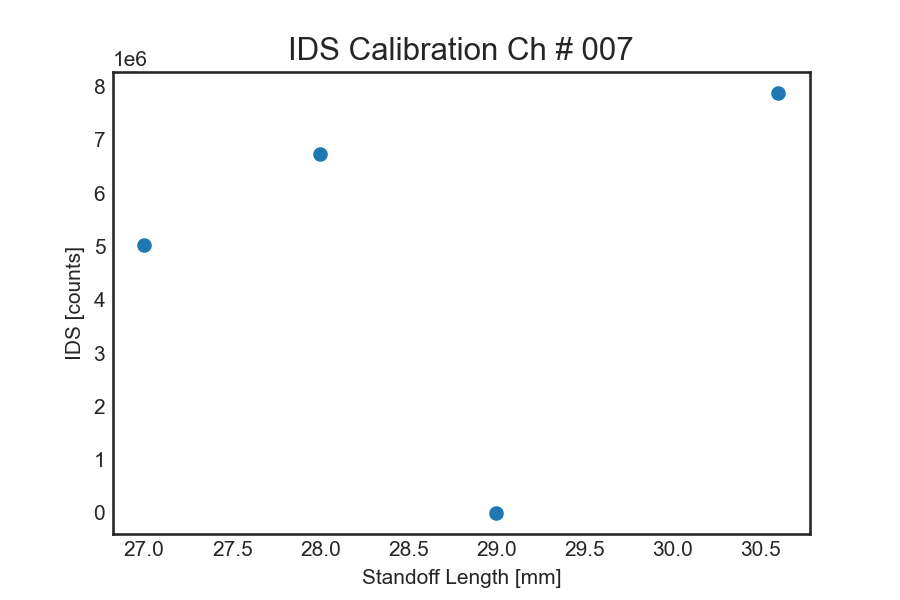

In [25]:
plot_ch=6
plot_calib(plot_ch)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
for ch_no in range(48):
# for ch_no in [0]:
    # ch_no=3
    # print(ch_no+1)
    df = get_df(ch_no+1)
    ldc_pts = []
    ldc_pts = np.zeros(4)
    for i in range(4):
        avg = average(df[i]['LDC SENSOR'])
        # print(avg)
        ldc_pts[i]=avg
    ax.scatter(cal_len,ldc_pts-ldc_pts[0])
ax.set_xlabel('Standoff Length [mm]')
ax.set_ylabel('IDS [counts]')
ax.set_title('IDS Calibration 48 Channels')
plt.savefig(fig_DIR+'IDS_Calibration_diff'+'.png')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
for ch_no in range(48):
# for ch_no in [0]:
    # ch_no=3
    # print(ch_no+1)
    df = get_df(ch_no+1)
    ldc_pts = []
    ldc_pts = np.zeros(4)
    for i in range(4):
        avg = average(df[i]['LDC SENSOR'])
        # print(avg)
        ldc_pts[i]=avg
    ax.scatter(cal_len,ldc_pts)
ax.set_xlabel('Standoff Length [mm]')
ax.set_ylabel('IDS [counts]')
ax.set_title('IDS Calibration 48 Channels')
plt.savefig(fig_DIR+'IDS_Calibration_diffs'+'.png')

In [ ]:
n_chan = 48
n_cal = 4
ldc_cum = np.zeros([n_chan,n_cal])
for ch_no in range(n_chan):
    df = get_df(ch_no+1)
    ldc_pts = np.zeros(n_cal)
    ldc_pts_diff = np.zeros(4)
    for i in range(n_cal):
        avg = average(df[i]['LDC SENSOR'])
        # print(avg)
        ldc_pts[i] = avg
    ldc_pts_diff = ldc_pts-ldc_pts[0]
    ldc_cum[ch_no,:] = ldc_pts_diff

In [ ]:
fig = plt.figure(figsize=[6,4])
ax1 =plt.subplot(1,1,1)
ax1.boxplot([ldc_cum[:,1]],positions=[28],patch_artist=True)
# ax1.boxplot([key_ch0[idx_s100]-key_ch0[0],key_ch1[idx_s100]-key_ch1[0]],positions=[0,1],patch_artist=True)
ax1.set_ylabel('IDS [counts]')
ax1.set_xlabel('Standoff Distance [mm]')
ax1.set_title('Box Plot IDS Calibration Diff 28')
plt.savefig(fig_DIR+'IDS_Calibration_box_28'+'.png')

In [ ]:
fig = plt.figure(figsize=[6,4])
ax1 =plt.subplot(1,1,1)
ax1.boxplot([ldc_cum[:,2]],positions=[29],patch_artist=True)
# ax1.boxplot([key_ch0[idx_s100]-key_ch0[0],key_ch1[idx_s100]-key_ch1[0]],positions=[0,1],patch_artist=True)
ax1.set_ylabel('IDS [counts]')
ax1.set_xlabel('Standoff Distance [mm]')
ax1.set_title('Box Plot IDS Calibration Diff 29')
plt.savefig(fig_DIR+'IDS_Calibration_box_29'+'.png')

In [ ]:
fig = plt.figure(figsize=[6,4])
ax1 =plt.subplot(1,1,1)
ax1.boxplot([ldc_cum[:,3]],positions=[30.6],patch_artist=True)
# ax1.boxplot([key_ch0[idx_s100]-key_ch0[0],key_ch1[idx_s100]-key_ch1[0]],positions=[0,1],patch_artist=True)
ax1.set_ylabel('IDS [counts]')
ax1.set_xlabel('Standoff Distance [mm]')
ax1.set_title('Box Plot IDS Calibration Diff 30.6')
plt.savefig(fig_DIR+'IDS_Calibration_box_30p6'+'.png')

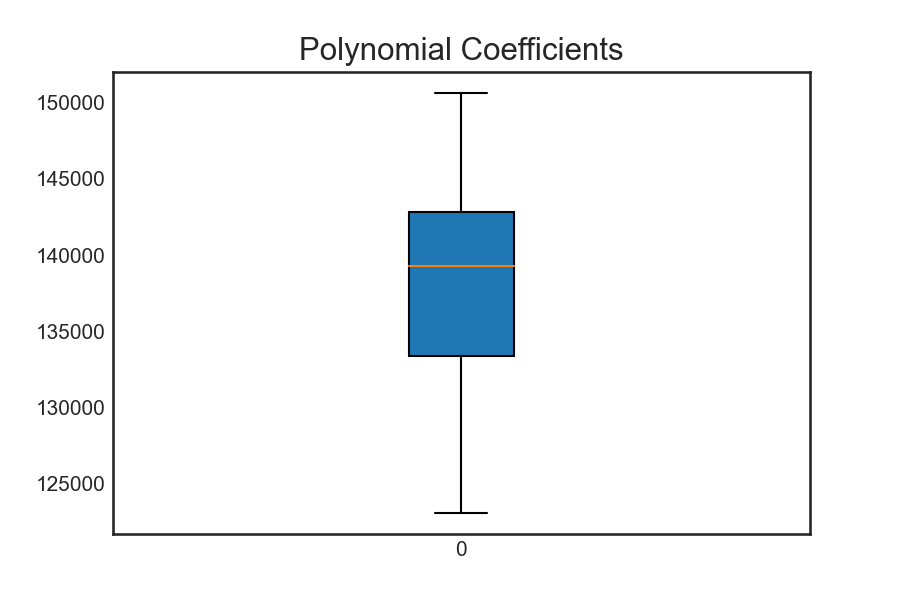

In [38]:
fig = plt.figure(figsize=[6,4])
ax1 =plt.subplot(1,1,1)
ax1.boxplot([pol[:,0]],positions=[0],patch_artist=True)
# ax1.boxplot([key_ch0[idx_s100]-key_ch0[0],key_ch1[idx_s100]-key_ch1[0]],positions=[0,1],patch_artist=True)
ax1.set_title('Polynomial Coefficients')
plt.savefig(fig_DIR+'IDS_Calibration_coeffs'+'.png')

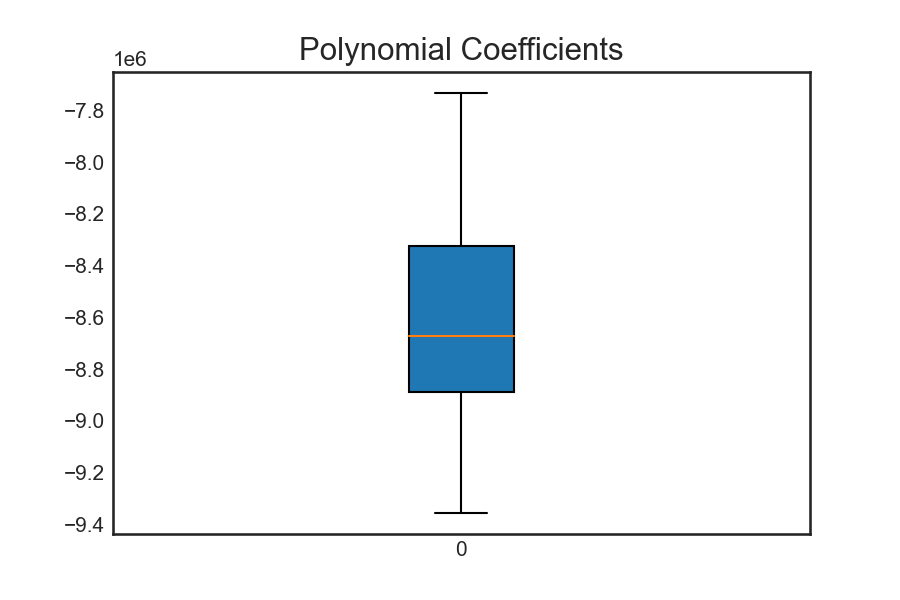

In [39]:
fig = plt.figure(figsize=[6,4])
ax1 =plt.subplot(1,1,1)
ax1.boxplot([pol[:,1]],positions=[0],patch_artist=True)
# ax1.boxplot([key_ch0[idx_s100]-key_ch0[0],key_ch1[idx_s100]-key_ch1[0]],positions=[0,1],patch_artist=True)
ax1.set_title('Polynomial Coefficients')
plt.savefig(fig_DIR+'IDS_Calibration_coeffs'+'.png')

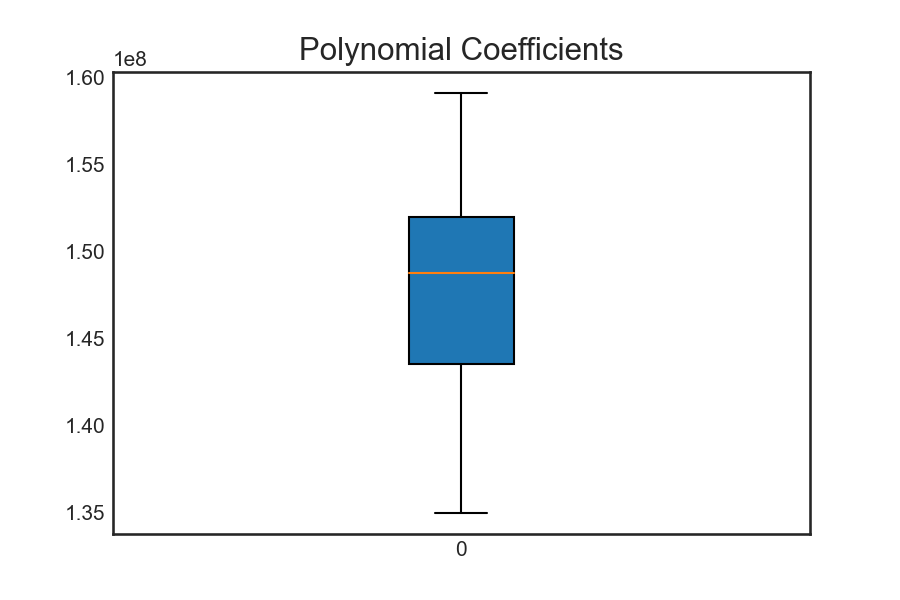

In [40]:
fig = plt.figure(figsize=[6,4])
ax1 =plt.subplot(1,1,1)
ax1.boxplot([pol[:,2]],positions=[0],patch_artist=True)
# ax1.boxplot([key_ch0[idx_s100]-key_ch0[0],key_ch1[idx_s100]-key_ch1[0]],positions=[0,1],patch_artist=True)
ax1.set_title('Polynomial Coefficients')
plt.savefig(fig_DIR+'IDS_Calibration_coeffs'+'.png')